In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

# 
Lets look at the dataset and the first and last five rows of dataset.

In [3]:
df = pd.read_csv(r'C:\Users\r_nem\OneDrive\Desktop\rucha_activity\Datasets\archive (13)\winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# 
Let’s explore the type of data present in each of the columns present in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 
Now we’ll explore the descriptive statistical measures of the dataset.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# 
Exploratory Data Analysis
EDA is an approach to analysing the data using visual techniques. 
It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and 
graphical representations. 
Now let’s check the number of null values in the dataset columns wise.

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 
Let’s draw the histogram to visualise the distribution of the data with continuous values in the columns of the dataset.

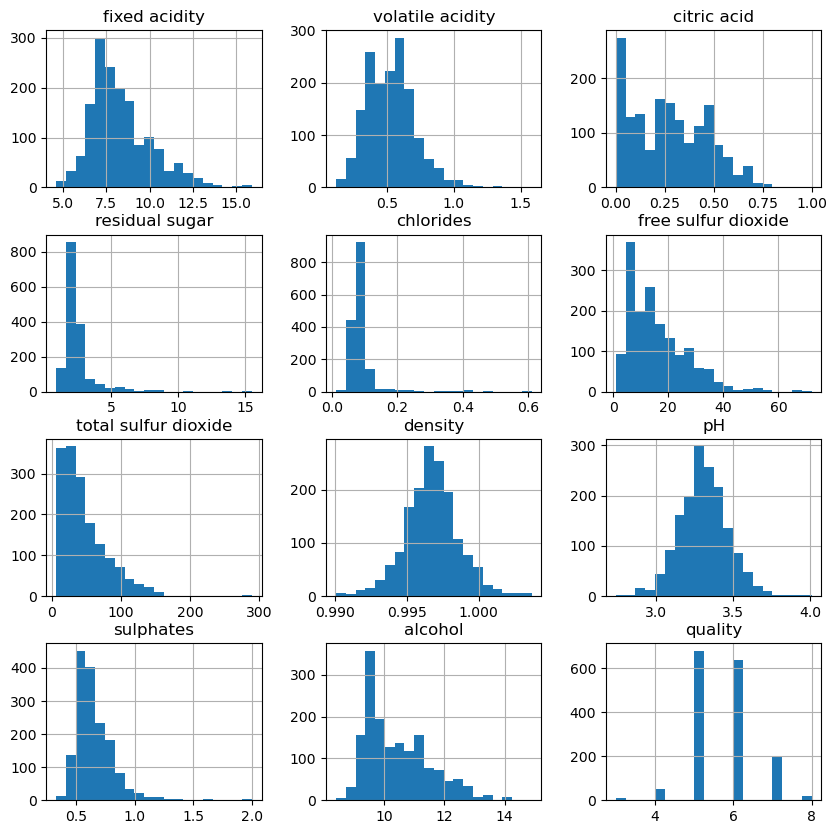

In [9]:
df.hist(bins=20, figsize=(10,10))
plt.show()

# 
Now let’s draw the count plot to visualise the number data for each quality of wine.

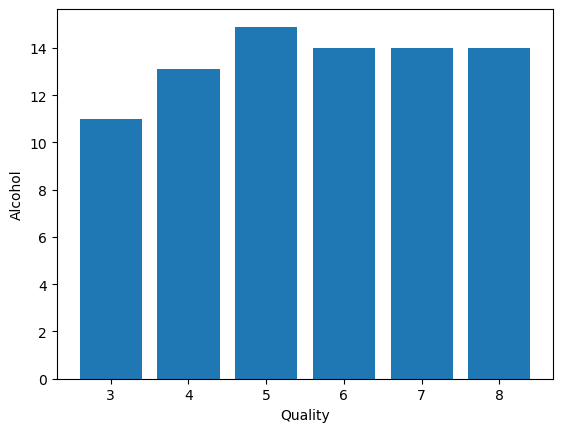

In [10]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

# 
There are times the data provided to us contains redundant features they do not help with increasing the model’s performance that is why we remove them before using them to train our model.

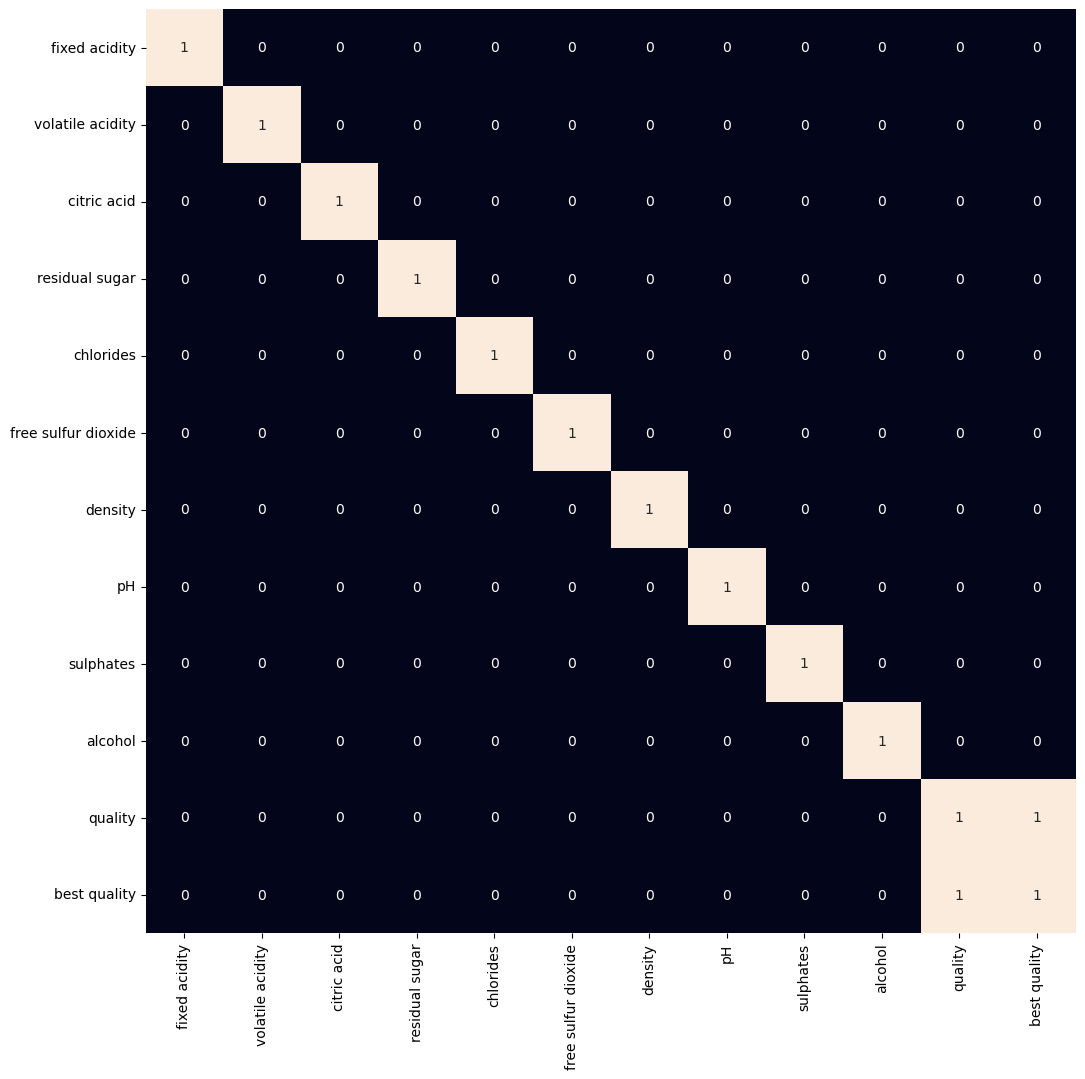

In [96]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()

# 
From the above heat map we can conclude that the ‘total sulphur dioxide’ and ‘free sulphur dioxide‘ are highly correlated features so, we will remove them.

In [14]:
df = df.drop('total sulfur dioxide', axis=1)

# Model Development
Let’s prepare our data for training and splitting it into training and validation data so, that we can select which model’s performance is best as per the use case. We will train some of the state of the art machine learning classification models and then select best out of them using validation data.

In [15]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

# 
We have a column with object data type as well let’s replace it with the 0 and 1 as there are only two categories.

In [16]:
df.replace({'white':1, 'red':0}, inplace=True)

# 
After segregating features and the target variable from the dataset we will split it into 80:20 ratio for model selection.

In [17]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=0)
xtrain.shape, xtest.shape

((1279, 10), (320, 10))

# 
Normalising the data before training help us to achieve stable and fast training of the model.

In [21]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

# 
As the data has been prepared completely let’s train some state of the art machine learning model on it.

In [67]:
from sklearn.linear_model import LinearRegression

models = [LinearRegression(), GaussianNB(), KNeighborsClassifier()]

for i in range(3):
    models[i].fit(xtrain, ytrain)
    print(f'{models[i]} : ')
    print('Traning Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))
    print()

LinearRegression() : 
Traning Accuracy :  0.8129501704874862
Validation Accuracy :  0.6206395348837209

GaussianNB() : 
Traning Accuracy :  0.7271389546709641
Validation Accuracy :  0.5015713387806411

KNeighborsClassifier() : 
Traning Accuracy :  0.8027553136085371
Validation Accuracy :  0.4940289126335637



# Model Evaluation
From the above accuracies we can say that Linear Regression and GaussianNB() classifier performing better on the validation data with less difference between the validation and training data. Let’s plot the confusion matrix and calculate classification report as well for the validation data using the Linear Regression model.

In [73]:
from sklearn.metrics import classification_report

print(metrics.classification_report(ytest, models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.47      0.19      0.27       148
           1       0.54      0.81      0.65       172

    accuracy                           0.53       320
   macro avg       0.50      0.50      0.46       320
weighted avg       0.51      0.53      0.47       320



In [93]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, models[1].predict(xtest))
print(cm)

[[ 28 120]
 [ 32 140]]


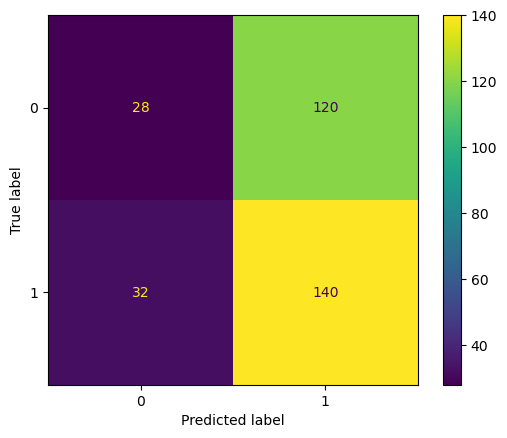

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()
